## Looking into LeNet-5 with random weight initialization


![](https://raw.githubusercontent.com/andandandand/images-for-colab-notebooks/refs/heads/main/Lenet5.png)

In [125]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision.transforms.v2 import ToImage, ToDtype
import matplotlib.pyplot as plt

# Define the transformations
transform = transforms.Compose([
    ToImage(),
    ToDtype(torch.float32, scale=True)
])

# Load MNIST dataset with the transformations
mnist_dataset = torchvision.datasets.MNIST(
    root='./data',  # Where to store the dataset
    train=True,     # Use training set
    download=True,  # Download if not already in your instance
    transform=transform
)

# Get a single image
image, label = mnist_dataset[0]  # Get the first image and its label


In [126]:
# Print information about the image
print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")
print(f"Image min value: {image.min()}")
print(f"Image max value: {image.max()}")
print(f"Label: {label}")

Image shape: torch.Size([1, 28, 28])
Image dtype: torch.float32
Image min value: 0.0
Image max value: 1.0
Label: 5


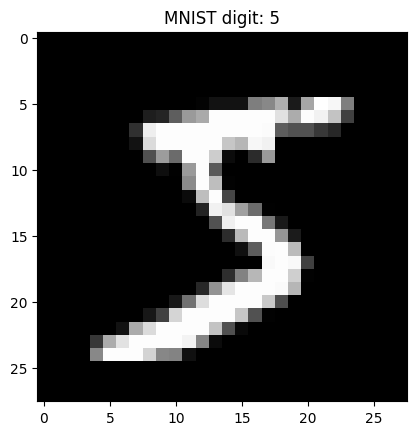

In [127]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"MNIST digit: {label}")
plt.show()

In [128]:
conv1 = nn.Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))

In [129]:
with torch.inference_mode():
  first_conv_output = conv1(image)

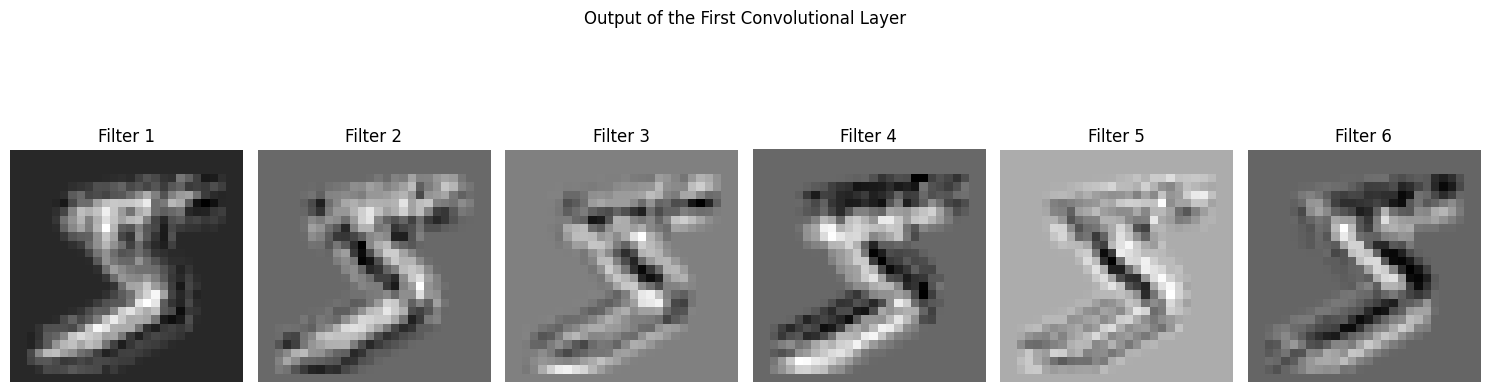

In [130]:

# Assuming 'first_conv_output' is the output from the first convolutional layer
# and it has the shape (number_of_filters, height, width)
num_filters = first_conv_output.shape[0]

# Create a figure and subplots
fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))  # Adjust figsize as needed

# Loop through each filter's output and plot it
for i in range(num_filters):
    axes[i].imshow(first_conv_output[i].detach().numpy(), cmap='gray')  # Detach from computation graph if needed
    axes[i].axis('off')  # Turn off axis ticks and labels
    axes[i].set_title(f'Filter {i+1}')

fig.suptitle('Output of the First Convolutional Layer')


plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [131]:
first_relu_output = F.relu(first_conv_output)
first_relu_output.shape

torch.Size([6, 28, 28])

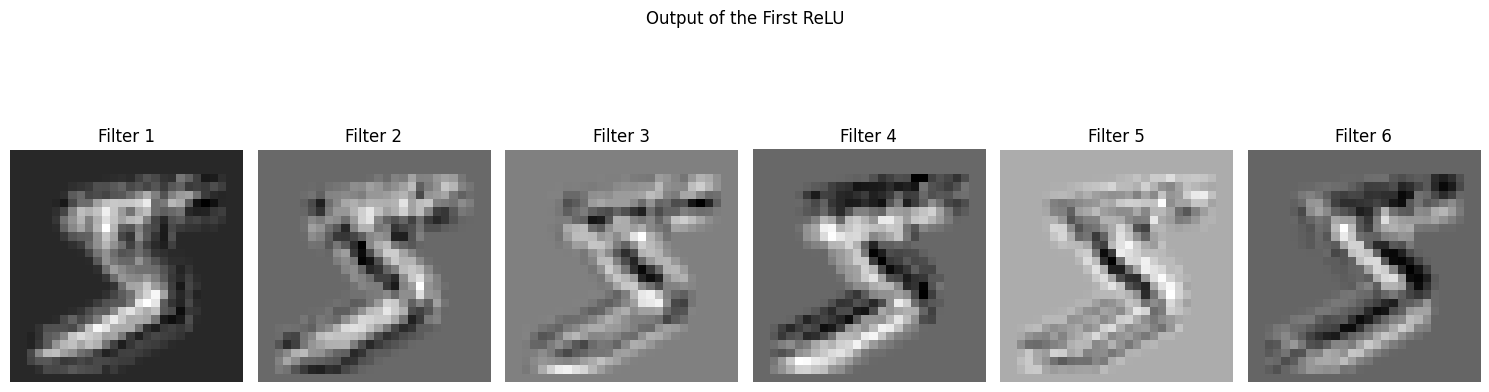

In [132]:
# Create a figure and subplots
fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))  # Adjust figsize as needed

# Loop through each filter's output and plot it
for i in range(num_filters):
    axes[i].imshow(first_conv_output[i].detach().numpy(), cmap='gray')  # Detach from computation graph if needed
    axes[i].axis('off')  # Turn off axis ticks and labels
    axes[i].set_title(f'Filter {i+1}')

fig.suptitle('Output of the First ReLU')
plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [133]:
first_max_pool_output = F.max_pool2d(input=first_relu_output, kernel_size=2, stride=2)
first_max_pool_output.shape

torch.Size([6, 14, 14])

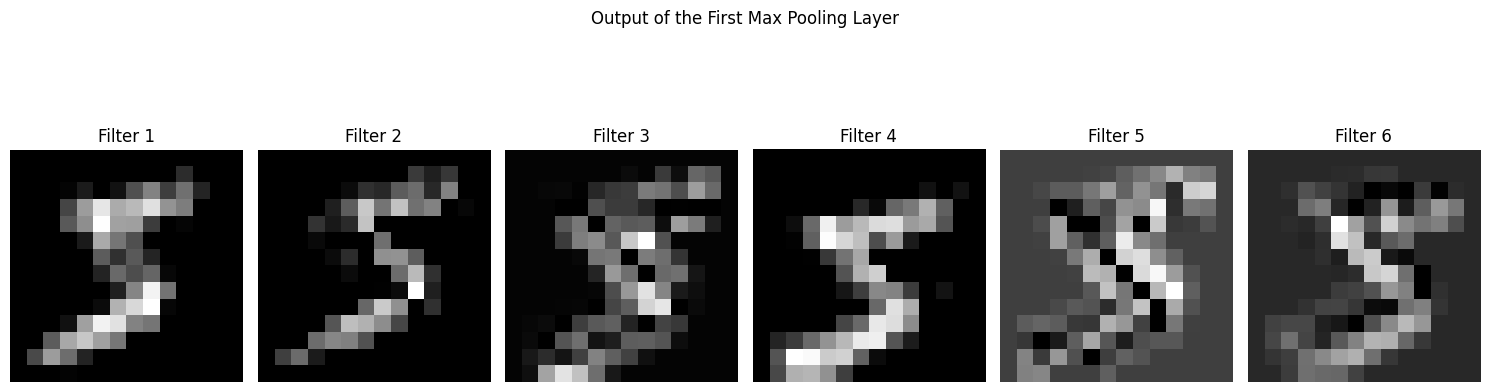

In [134]:
# Create a figure and subplots
fig, axes = plt.subplots(1, num_filters, figsize=(15, 5))  # Adjust figsize as needed

# Loop through each filter's output and plot it
for i in range(num_filters):
    axes[i].imshow(first_max_pool_output[i].detach().numpy(), cmap='gray')  # Detach from computation graph if needed
    axes[i].axis('off')  # Turn off axis ticks and labels
    axes[i].set_title(f'Filter {i+1}')


fig.suptitle('Output of the First Max Pooling Layer')
plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [135]:
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)

with torch.inference_mode():
  second_conv_output = F.relu(conv2(first_max_pool_output))

second_conv_output.shape

torch.Size([16, 10, 10])

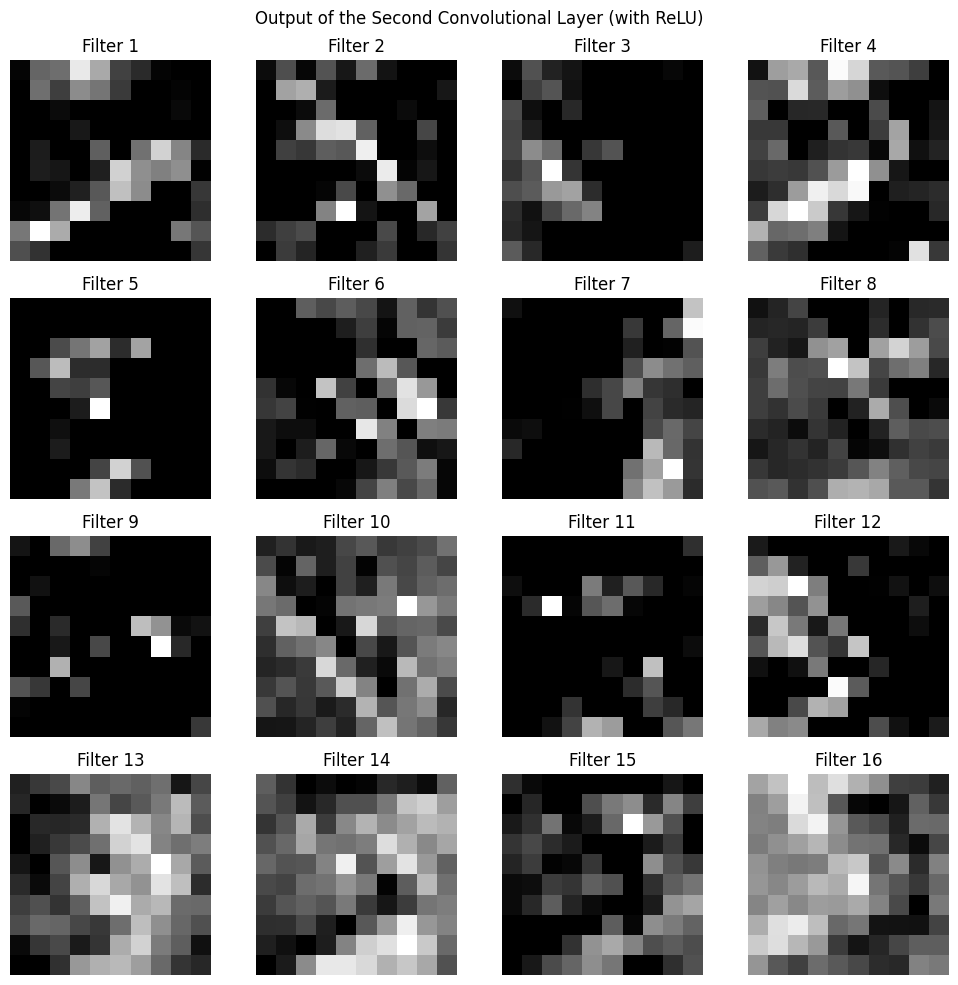

In [136]:
# Assuming 'second_conv_output' is the output from the second convolutional layer
# and it has the shape (number_of_filters, height, width)
num_filters = second_conv_output.shape[0]

# Create a figure and subplots with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # Adjust figsize as needed

# Loop through each filter's output and plot it
# 'k' will iterate through filters
# 'i' and 'j' will be used for row and column indexing in the subplot
k = 0
for i in range(4):  # 4 rows
    for j in range(4):  # 4 columns
        if k < num_filters:  # Make sure we don't exceed the number of filters
            axes[i, j].imshow(second_conv_output[k].detach().numpy(), cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].set_title(f'Filter {k+1}')
            k += 1  # Move to the next filter
        else:
            axes[i, j].axis('off')  # Turn off unused subplots

fig.suptitle('Output of the Second Convolutional Layer (with ReLU)')
plt.tight_layout()  # Adjust subplot spacing
plt.show()

In [137]:
second_max_pool_output = F.max_pool2d(input=second_conv_output, kernel_size=2, stride=2)
second_max_pool_output.shape

torch.Size([16, 5, 5])

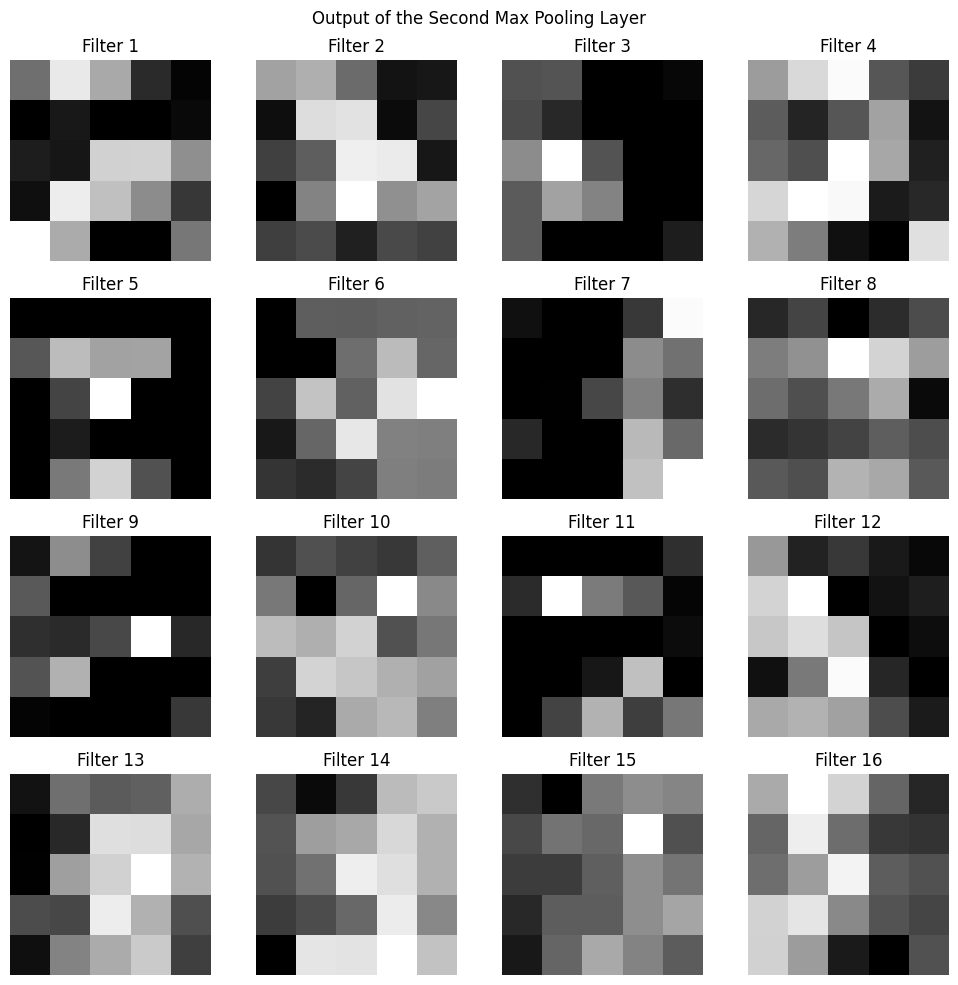

In [138]:
# Get the number of filters in the output
num_filters = second_max_pool_output.shape[0]

# Create a figure and subplots with 4 rows and 4 columns
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Loop through each filter's output and plot it
k = 0  # Index for iterating through filters
for i in range(4):  # Rows
    for j in range(4):  # Columns
        if k < num_filters:
            axes[i, j].imshow(second_max_pool_output[k].detach().numpy(), cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].set_title(f'Filter {k + 1}')
            k += 1
        else:
            axes[i, j].axis('off')  # Turn off unused subplots

fig.suptitle('Output of the Second Max Pooling Layer')
plt.tight_layout()
plt.show()

In [139]:
second_max_pool_output_flattened = second_max_pool_output.flatten()
second_max_pool_output_flattened.shape

torch.Size([400])

In [140]:
output_first_linear_layer = nn.Linear(in_features=400, out_features=120)(second_max_pool_output_flattened)
output_first_linear_layer.shape

torch.Size([120])

In [141]:
output_second_linear_layer = nn.Linear(in_features=120, out_features=84)(output_first_linear_layer)
output_second_linear_layer.shape



torch.Size([84])

In [142]:
output_third_linear_layer = nn.Linear(in_features=84, out_features=10)(output_second_linear_layer)
output_third_linear_layer.shape

torch.Size([10])